In [53]:
from helpers.vae import VAE
from helpers.train import train_online, train

In [54]:
from helpers.convert_to_var_foo import convert_to_var

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)


In [56]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.nn import functional as F

In [57]:
states = np.load('trajectories/state_history.npy')
states_ids = np.load('trajectories/state_ids.npy')
counters = np.load('trajectories/counters.npy')
counters = counters.sum(axis=2)

In [60]:
def plot_corr_hist(corr, label='w_KL=1'):
    fontsize = 20
    plt.hist(corr, bins=20,label=label)
    plt.xlabel("Коэффициент корреляции Пирсона", fontsize=fontsize)
    plt.xlim((-1,1))
    plt.ylabel("Количество эпизодов", fontsize=fontsize)
    plt.title("Корреляция между псевдосчетчиками и эмпирическими счетчиками", fontsize=fontsize)
    plt.grid()
    plt.legend(loc='upper right', fontsize=fontsize)

In [61]:
counters.shape

(7600, 10)

In [62]:
dim = counters.shape[1]
test = []
cur_class = 0
for cl, obj in zip(states_ids, states):
    if cl == cur_class:
        test.append(obj)
        cur_class += 1
    if cur_class == 10:
        break
test = np.array(test)

In [63]:
test.shape

(10, 10)

t=0
t=100
t=200
t=300
t=400
t=500
t=600
t=700
t=800
t=900
t=1000
t=1100
t=1200
t=1300
t=1400
t=1500
t=1600
t=1700
t=1800
t=1900
t=2000
t=2100
t=2200
t=2300
t=2400
t=2500
t=2600
t=2700
t=2800
t=2900
t=3000
t=3100
t=3200
t=3300
t=3400
t=3500
t=3600
t=3700
t=3800
t=3900
t=4000
t=4100
t=4200
t=4300
t=4400
t=4500
t=4600
t=4700
t=4800
t=4900
t=5000
t=5100
t=5200
t=5300
t=5400
t=5500
t=5600
t=5700
t=5800
t=5900
t=6000
t=6100
t=6200
t=6300
t=6400
t=6500
t=6600
t=6700
t=6800
t=6900
t=7000
t=7100
t=7200
t=7300
t=7400
t=7500
CPU times: user 7min 19s, sys: 9.25 s, total: 7min 28s
Wall time: 7min 29s


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


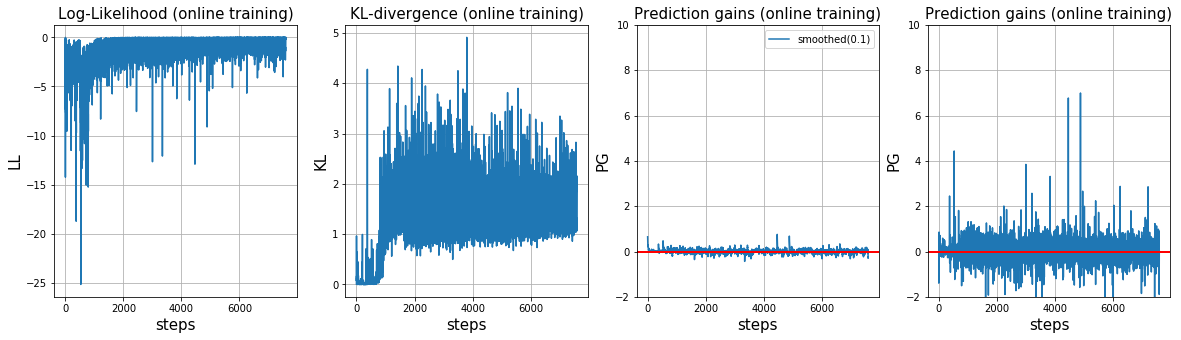

In [67]:
%%time

dim = 10
model = VAE(input_shape=(-1, dim), n_samples=25, fc_size=512)
optimizer = optim.RMSprop(model.parameters(), lr=5*1e-5, momentum=0.9, eps=1e-4)
results = train_online(states_ids, test, model, optimizer, kl_weight=1, img_name=None)

In [11]:
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results

In [12]:
len(pgs[1])

7600

In [23]:
def get_pseudo_count(pg):
    eps = 1e-6

    exp = np.exp(max(0, pg))
    cnt = (exp - 1 + eps) ** (- 1)

    return cnt

def get_counters(schedule, pgs, num_classes,label):
    real_counters = [[0] for _ in range(num_classes)]
    pseudo_counters = [[0] for _ in range(num_classes)]

    for j in range(num_classes):
        for i in range(len(pgs[j])):
            pseudo_counters[j].append(get_pseudo_count(pgs[j][i]))
            if schedule[i] == j:
                real_counters[j].append(real_counters[j][-1]+1)
            else:
                real_counters[j].append(real_counters[j][-1])
    real_counters = np.array(real_counters)
    pseudo_counters = np.array(pseudo_counters)
    corr_coef = []
    for i in range(real_counters.shape[1]):
        if i > 0 and i % 19 == 0:
            corr_coef.append(np.corrcoef(real_counters[:,i],
                                         pseudo_counters[:,i])[0][1])
    corr_coef = np.array(corr_coef)
    corr_coef = corr_coef[True-np.isnan(corr_coef)]
    plot_corr_hist(corr_coef,label=label)
    return real_counters, pseudo_counters


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


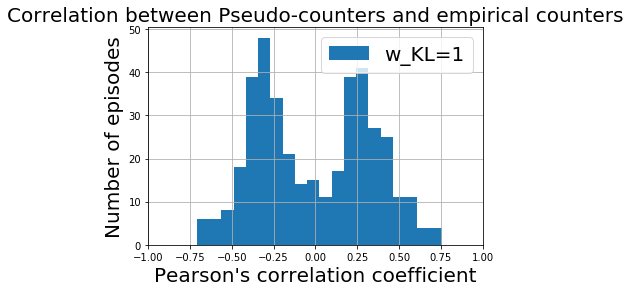

In [24]:
real_counters, pseudo_counters = get_counters(states_ids, pgs, 10,label ='w_KL=1')

t=0
t=100
t=200
t=300
t=400
t=500
t=600
t=700
t=800
t=900
t=1000
t=1100
t=1200
t=1300
t=1400
t=1500
t=1600
t=1700
t=1800
t=1900
t=2000
t=2100
t=2200
t=2300
t=2400
t=2500
t=2600
t=2700
t=2800
t=2900
t=3000
t=3100
t=3200
t=3300
t=3400
t=3500
t=3600
t=3700
t=3800
t=3900
t=4000
t=4100
t=4200
t=4300
t=4400
t=4500
t=4600
t=4700
t=4800
t=4900
t=5000
t=5100
t=5200
t=5300
t=5400
t=5500
t=5600
t=5700
t=5800
t=5900
t=6000
t=6100
t=6200
t=6300
t=6400
t=6500
t=6600
t=6700
t=6800
t=6900
t=7000
t=7100
t=7200
t=7300
t=7400
t=7500
CPU times: user 7min 53s, sys: 23.9 s, total: 8min 17s
Wall time: 8min 19s


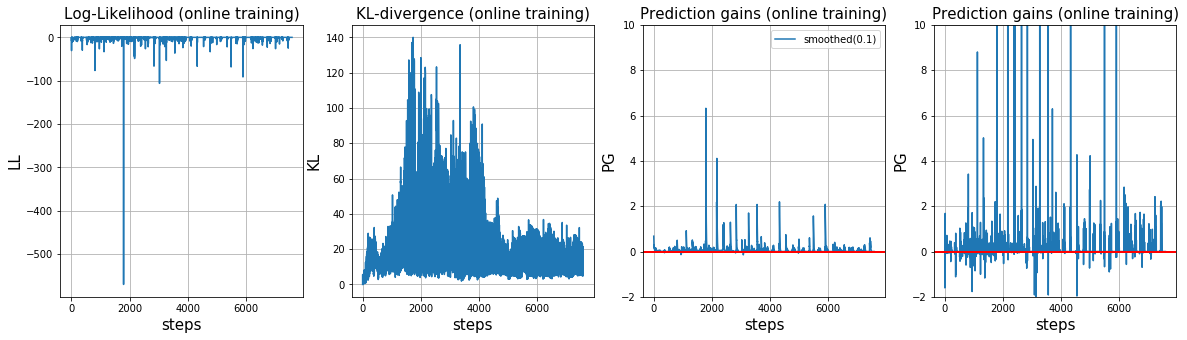

In [25]:
%%time

dim = 10
model = VAE(input_shape=(-1, dim), n_samples=25, fc_size=512)
optimizer = optim.RMSprop(model.parameters(), lr=5*1e-5, momentum=0.9, eps=1e-4)
results_1 = train_online(states_ids, test, model, optimizer, kl_weight=1e-4, img_name=None)

In [40]:
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results_1

In [41]:
pgs = np.array(pgs)

In [42]:
pgs_ = np.copy(pgs)

In [43]:
pgs.shape

(10, 7600)

In [44]:
n = pgs.shape[1]

In [45]:
(pgs / (np.arange(n)+1)).shape

(10, 7600)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


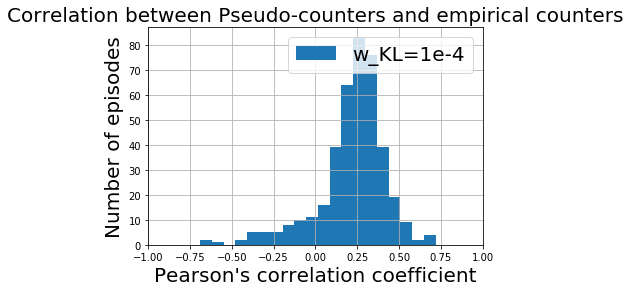

In [52]:
real_counters, pseudo_counters = get_counters(states_ids, pgs / (19*(np.arange(n)+1))**1, 10,label ='w_KL=1e-4')